<a href="https://colab.research.google.com/github/monsur28/Social-Media-Sentiment-Analysis/blob/main/twitter_sentiment_analysis_on_cochecla_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/twitter sentiment analysis on cochecla performance.csv')

# Display the first few rows of the data
print(data.head())


   index coachella_sentiment coachella_yn           name  retweet_count  \
0      0            positive          yes       kokombil              0   
1      1            positive          yes  MisssTaraaa10              2   
2      2            positive          yes  NMcCracken805              0   
3      3            positive          yes         wxpnfm              1   
4      4            positive          yes       Caesears              0   

                                                text tweet_coord  \
0  #Coachella2015 tickets selling out in less tha...  [0.0, 0.0]   
1  RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...         NaN   
2  #Coachella2015 #VIP passes secured! See you th...         NaN   
3  PhillyÛªs @warondrugsjams will play #Coachell...         NaN   
4  If briana and her mom out to #Coachella2015  i...         NaN   

    tweet_created      tweet_id                  tweet_location user_timezone  
0  1/7/2015 15:02  5.530000e+17                             

<ipython-input-9-66981a2e7b56>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


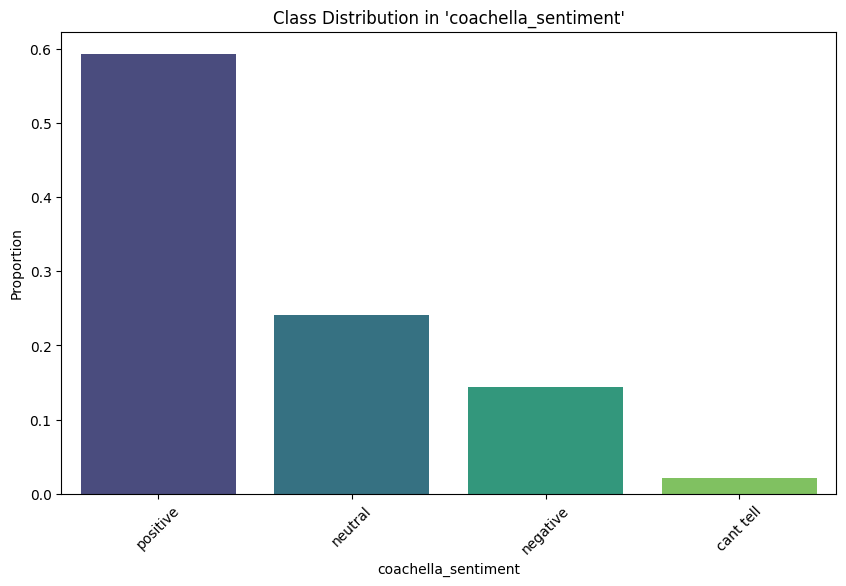

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a column to analyze, e.g., 'coachella_sentiment'
column_to_analyze = 'coachella_sentiment'

# Check if the column exists
if column_to_analyze in data.columns:
    # Calculate class distribution
    class_distribution = data[column_to_analyze].value_counts(normalize=True)

    # Plot the class distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
    plt.title(f"Class Distribution in '{column_to_analyze}'")
    plt.xlabel(column_to_analyze)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Column '{column_to_analyze}' not found in the dataset.")


In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Load your dataset
data = pd.read_csv('/content/twitter sentiment analysis on cochecla performance.csv')  # Replace with your actual file path

# Step 1: Define the correct column names
text_column = 'text'  # Correct column name for text data
target_column = 'coachella_sentiment'  # Correct column name for sentiment

# Step 2: Drop unnecessary columns and remove missing values in text and target columns
if target_column in data.columns and text_column in data.columns:
    data_cleaned = data.dropna(subset=[text_column, target_column])
else:
    raise ValueError(f"Columns '{text_column}' or '{target_column}' not found in the dataset")

# Step 3: Encode the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data_cleaned[text_column])

# Step 4: Encode the target variable using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_cleaned[target_column])

# Step 5: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 6: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Display the new class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({3: 2283, 2: 2283, 1: 2283, 0: 2283})


<ipython-input-16-3dde11abbd59>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Count', data=class_distribution_df, palette="viridis")


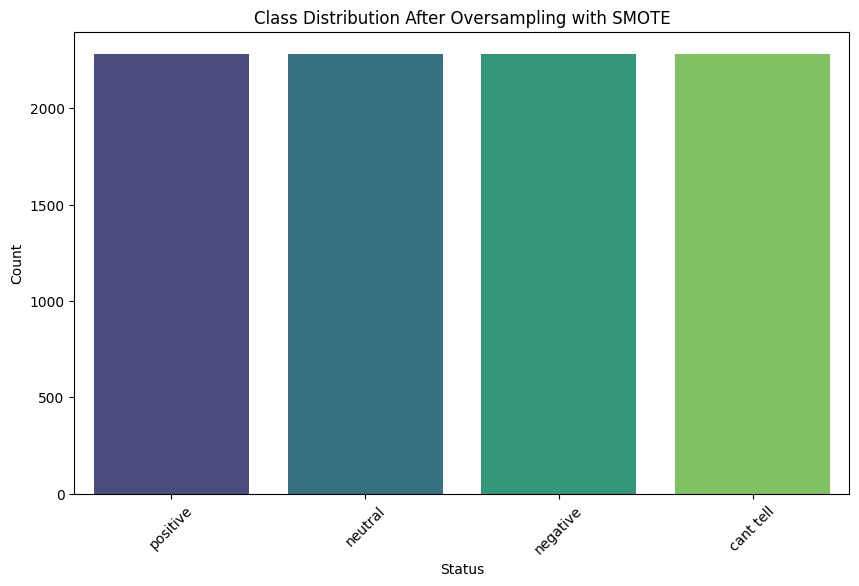

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Check if the resampled data and label encoder exist before proceeding
if 'y_resampled' in locals() and 'label_encoder' in locals():
    # Count the new class distribution after SMOTE
    class_distribution_resampled = Counter(y_resampled)

    # Convert to a DataFrame for easier plotting
    class_distribution_df = pd.DataFrame(list(class_distribution_resampled.items()), columns=['Status', 'Count'])

    # Convert numeric labels back to original class names
    try:
        class_distribution_df['Status'] = label_encoder.inverse_transform(class_distribution_df['Status'])
    except ValueError as e:
        print(f"Error during inverse transformation: {e}")
        print("Check if label encoding was applied correctly.")
        raise

    # Plot the resampled class distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Status', y='Count', data=class_distribution_df, palette="viridis")
    plt.title("Class Distribution After Oversampling with SMOTE")
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: 'y_resampled' or 'label_encoder' not found. Ensure SMOTE and label encoding steps have been completed.")


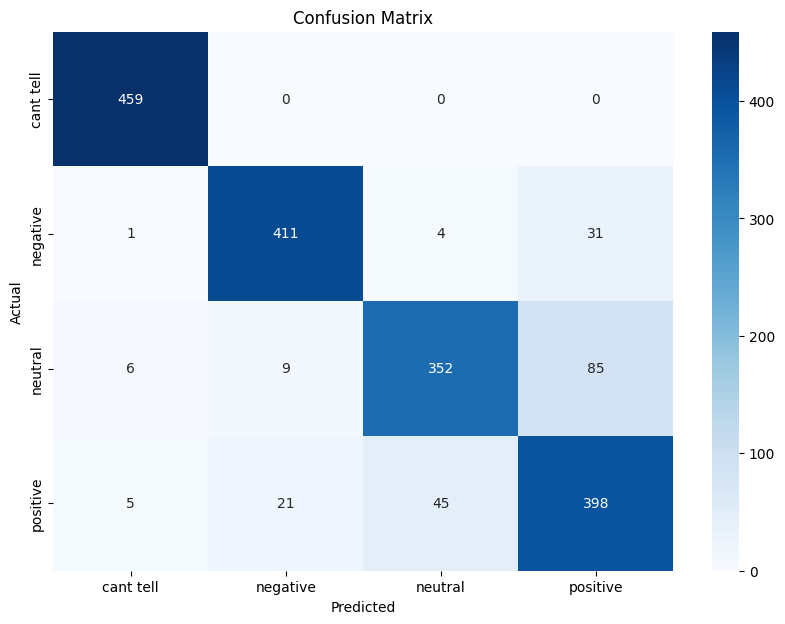

Classification Report:
               precision    recall  f1-score   support

   cant tell       0.97      1.00      0.99       459
    negative       0.93      0.92      0.93       447
     neutral       0.88      0.78      0.83       452
    positive       0.77      0.85      0.81       469

    accuracy                           0.89      1827
   macro avg       0.89      0.89      0.89      1827
weighted avg       0.89      0.89      0.89      1827



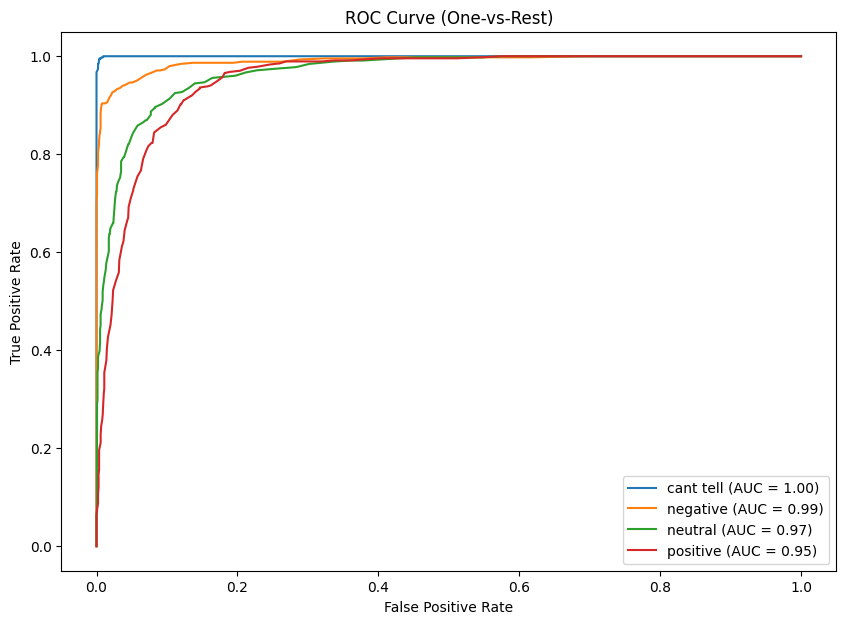

In [18]:
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Ensure that the label_encoder and model are already defined and fitted before making predictions

# Define and train the model (Example: RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Train on the resampled data

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # Probability predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ROC Curve for one-vs-rest (multiclass)
plt.figure(figsize=(10, 7))
for i in range(len(label_encoder.classes_)):
    # Compute ROC curve for each class using true binary labels for each class
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc_score = roc_auc_score(y_test == i, y_proba[:, i])

    # Plot each ROC curve
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {auc_score:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.show()


In [20]:
# Testing the model with custom input from keyboard
def test_custom_statement():
    user_input = input("Enter a tweet: ")
    user_input_transformed = tfidf_vectorizer.transform([user_input])  # Transforming the input tweet
    prediction = model.predict(user_input_transformed)  # Make prediction
    predicted_status = label_encoder.inverse_transform(prediction)  # Convert numeric label back to original sentiment label
    print("Predicted Sentiment:", predicted_status[0])  # Display the predicted sentiment

# Call the function for testing
test_custom_statement()


Enter a tweet: "The Coachella lineup this year is amazing! Can't wait to see the performances!"  You can input this tweet into your model's test function to check its sentiment prediction. It could potentially be classified as positive if the sentiment is recognized as excited or positive about the event.
Predicted Sentiment: positive
